### Pytorch Quiz
- CNN을 활용한 모델을 만들어서 정확도 95% 이상의 Classifier를 만드세요
- 코드 수정 가능

In [1]:
from matplotlib import pyplot as plt
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader

#### Dataset download

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
dataloader_train = DataLoader(train_data, 
                              batch_size=16, 
                              shuffle=True)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
dataloader_test = DataLoader(test_data, 
                              batch_size=16, 
                              shuffle=True)

C:\Users\owner\Miniconda3\envs\cv_course\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### Check images

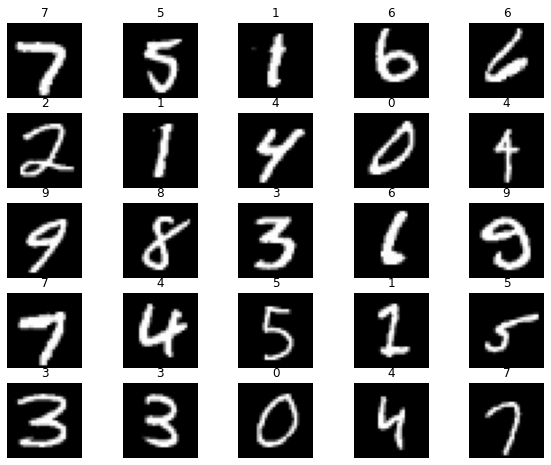

In [3]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        ## TODO ##
    def forward(self, x):
        ## TODO ##

#### Train

In [5]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

In [6]:
# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader_train):
        output = cnn(images)[0]               
        loss = loss_func(output, labels)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, loss.item()))

C:\Users\owner\Miniconda3\envs\cv_course\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/5], Step [100], Loss: 0.1000
Epoch [1/5], Step [200], Loss: 0.2912
Epoch [1/5], Step [300], Loss: 0.0360
Epoch [1/5], Step [400], Loss: 0.3647
Epoch [1/5], Step [500], Loss: 0.0234
Epoch [1/5], Step [600], Loss: 0.2077
Epoch [1/5], Step [700], Loss: 0.1163
Epoch [1/5], Step [800], Loss: 0.1942
Epoch [1/5], Step [900], Loss: 0.2125
Epoch [1/5], Step [1000], Loss: 0.1928
Epoch [1/5], Step [1100], Loss: 0.0098
Epoch [1/5], Step [1200], Loss: 0.3520
Epoch [1/5], Step [1300], Loss: 0.1294
Epoch [1/5], Step [1400], Loss: 0.1584
Epoch [1/5], Step [1500], Loss: 0.3537
Epoch [1/5], Step [1600], Loss: 0.0112
Epoch [1/5], Step [1700], Loss: 0.1480
Epoch [1/5], Step [1800], Loss: 0.0015
Epoch [1/5], Step [1900], Loss: 0.0506
Epoch [1/5], Step [2000], Loss: 0.2524
Epoch [1/5], Step [2100], Loss: 0.0287
Epoch [1/5], Step [2200], Loss: 0.2073
Epoch [1/5], Step [2300], Loss: 0.1062
Epoch [1/5], Step [2400], Loss: 0.0199
Epoch [1/5], Step [2500], Loss: 0.0924
Epoch [1/5], Step [2600], Loss: 0.

#### Test

In [7]:
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        test_output, last_layer = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        correct += (pred_y == labels).sum().item()
        total += labels.size(0)
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 97.13 Percent
